Examples of coloring cells and backgrounds using Python  
https://www.flickr.com/photos/kentbye/1156411944  
https://graphviz.readthedocs.io/en/stable/examples.html

`networkx` provides a higher level method to create and output dot files that has tools for getting information about the created graph like number of nodes and edges.
https://medium.com/swlh/a-tutorial-on-networkx-network-analysis-in-python-part-i-43c1d35830b6



In [1]:
import random

from graphviz import Digraph
from graphviz import Graph
from graphviz import Source   # Used to read existing dot files
from pathlib import Path

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}



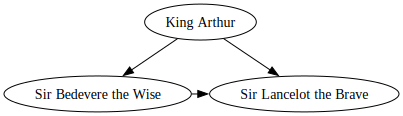

In [2]:
dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)
dot

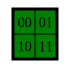

In [3]:
h = Graph('html_table')
h.attr('node', shape='none')
h.node('tab', label='''<<TABLE bgcolor="black">
    <TR>
    <TD color="green" bgcolor="green">00</TD>
    <TD color="green" bgcolor="green">01</TD>
    </TR>
    <TR>
    <TD color="green" bgcolor="green">10</TD>
    <TD color="green" bgcolor="green">11</TD>
    </TR>
    </TABLE>>''')

#print(h.source)
display(h)

The ```Parameters``` class is used as a struct to pass a group of parameters about the grid world

In [4]:
class Parameters():

    dims  = [0, 0]
    goals = []
    traps = []
    start = []
    goalNum  = 1
    trapNum = 2

This code generates a standard grid world. The grid is numbered from the bottem left as $00$

In [5]:

class DotGraph:
    
    def __init__(self,params,random):
        self.dim   = params.dims
        self.traps = params.traps
        self.start = params.start
        self.goals = params.goals
        self.goalNum = params.goalNum
        self.trapNum = params.trapNum
        
        self.graph = Graph('html_table')

        if random == True:
            self.randomize()
        
    def buildGraph(self):

        self.label = '<<TABLE bgcolor="black">'
        for y in range(self.dim[1]-1,-1,-1):
            self.label += '<TR>\n'
            for x in range(self.dim[0]):
                if [y,x] in self.traps:
                    color = 'red'
                    bgcolor = 'red'
                    label   = '<br/>Trap'
                elif [y,x] in self.start:
                    color = 'yellow'
                    bgcolor = 'yellow'
                    label   = '<br/>Start'
                elif [y,x] in self.goals:
                    color = 'green'
                    bgcolor = 'green'
                    label   = '<br/>Goal'
                else:
                    color = 'white'
                    bgcolor = 'white'
                    label   = '<br/> '
                self.label += f'<TD color="{color}" bgcolor="{bgcolor}" height="50px" width="50px">{y}{x}{label}</TD>\n'
            self.label += '</TR>\n'
        self.label += '</TABLE>>'

        self.graph.attr('node', shape='none')
        self.graph.node('tab',label=self.label)
        
    def randomize(self):

        self.goals = []
        for i in range(self.goalNum):
            while True:
                state = [random.randrange(self.dim[0]),random.randrange(self.dim[1])]
                if (state not in self.goals) and (state not in self.start):
                    break
            self.goals.append(state)
            
        self.traps = []
        for i in range(self.trapNum):
            while True:
                state = [random.randrange(self.dim[0]),random.randrange(self.dim[1])]
                if (state not in self.goals) and (state not in self.traps) and (state not in self.start):
                    break
            self.traps.append(state)

    def printGraph(self):
        print(self.label)

    def viewPdf(self):
        self.graph.view(self.label)
        
    def saveGraph(self,outfile,outFormat):
        self.graph.render(outfile, format=outFormat)


---
This variant of the ```DotGraph``` class prints each square with a state name $S_{xx}$

The grid is numbered from the upper left corner as $S_{00}$

In [6]:
class DotGraphSub(DotGraph):
            
    def buildGraph(self):

        self.label = '<<TABLE bgcolor="black">'
        for y in range(self.dim[1]):
            self.label += '<TR>\n'
            for x in range(self.dim[0]):
                lblHead = 'S<SUB>'+str(y)+str(x)+'</SUB><br/>'
                if [y,x] in self.traps:
                    color = 'red'
                    bgcolor = 'red'
                    label   = lblHead + '<br/>Trap'
                elif [y,x] in self.start:
                    color = 'yellow'
                    bgcolor = 'yellow'
                    label   = lblHead + '<br/>Start'
                elif [y,x] in self.goals:
                    color = 'green'
                    bgcolor = 'green'
                    label   = lblHead + '<br/>Goal'
                else:
                    color = 'white'
                    bgcolor = 'white'
                    label   = lblHead + '<br/> '
                self.label += f'<TD color="{color}" bgcolor="{bgcolor}" height="50px" width="50px">{label}</TD>\n'
            self.label += '</TR>\n'
        self.label += '</TABLE>>'
        
        self.graph.attr('node', shape='none')
        self.graph.node('tab',label=self.label)


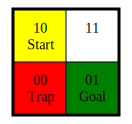

In [7]:
params = Parameters()
params.dims  = [2,2]
params.traps = [[0,0]]
params.start = [[1,0]]
params.goals = [[0,1]]
params.trapNum = 1

g = DotGraph(params,False)
g.buildGraph()
#g.printGraph()

display(g.graph)
#g.graph.view()  #Generate a PDF

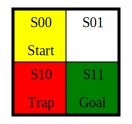

In [8]:
params = Parameters()
params.dims    = [2,2]
params.traps   = [[1,0]]
params.start   = [[0,0]]
params.goals   = [[1,1]]
params.trapNum = 1
params.goalNum = 1

g = DotGraphSub(params,False)
g.buildGraph()
#g.printGraph()

display(g.graph)
#g.graph.view()  #Generate a PDF

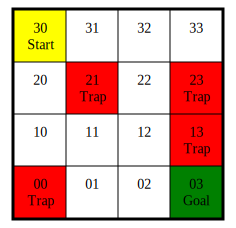

In [9]:
params = Parameters()

params.dims = [4,4]
params.traps = [[2,1],[2,3],[1,3],[0,0]]
params.start = [[3,0]]
params.goals = [[0,3]]
params.trapNum = 4
params.goalNum = 1

g = DotGraph(params,False)
g.buildGraph()
#g.printGraph()

display(g.graph)

g.saveGraph("Grid4x4","svg")
#g.graph.view()  #Generate a PDF

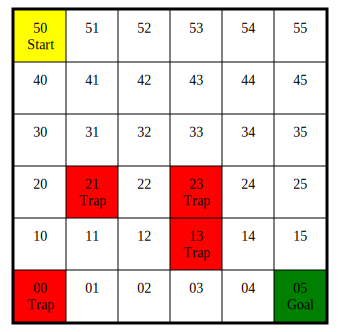

In [10]:
params = Parameters()

params.dims = [6,6]
params.traps = [[2,1],[2,3],[1,3],[0,0]]
params.start = [[5,0]]
params.goals = [[0,5]]
params.trapNum = 4
params.goalNum = 1

g = DotGraph(params,False)
g.buildGraph()
#g.printGraph()

display(g.graph)
#g.graph.view()  #Generate a PDF

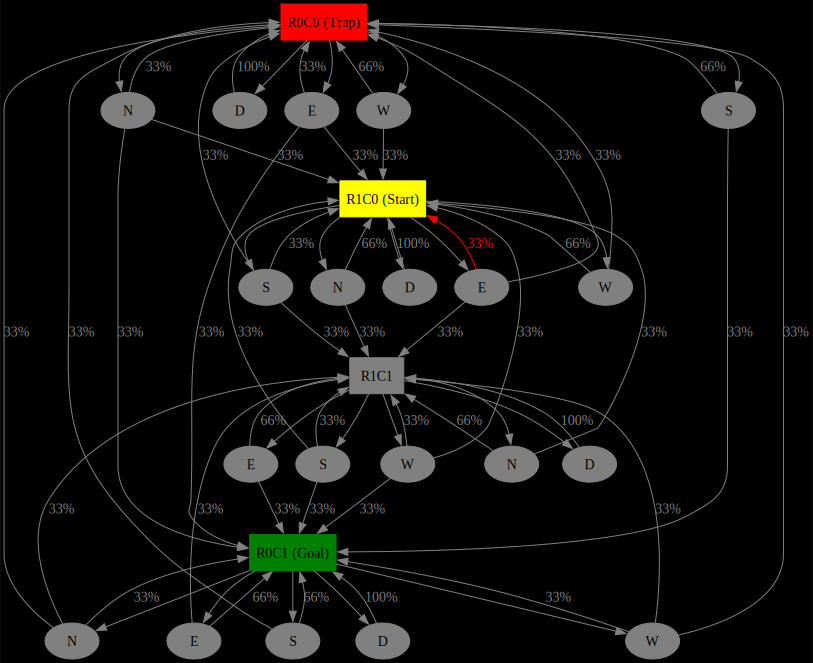

In [11]:
writeFile = False
outfile   = 'MDP.dot'

dot = Digraph(comment='MDP',edge_attr={'color':'gray','fontcolor':'gray'},node_attr={'color':'gray','fontcolor':'black','style':'filled'})

dot.attr(bgcolor='black', fontcolor='white')

dot.node('A', 'R0C0 (Trap)',shape='box',style='filled',color='red',fontcolor='black')
dot.node('B', 'R0C1 (Goal)',shape='box',style='filled',color='green',fontcolor='black')
dot.node('C', 'R1C0 (Start)',shape='box',style='filled',color='yellow',fontcolor='black')
dot.node('D', 'R1C1',shape='box')

dot.node('A1', 'N')
dot.node('A2', 'E')
dot.node('A3', 'S')
dot.node('A4', 'W')
dot.node('A5', 'D')

dot.node('B1', 'N')
dot.node('B2', 'E')
dot.node('B3', 'S')
dot.node('B4', 'W')
dot.node('B5', 'D')

dot.node('C1', 'N')
dot.node('C2', 'E')
dot.node('C3', 'S')
dot.node('C4', 'W')
dot.node('C5', 'D')

dot.node('D1', 'N')
dot.node('D2', 'E')
dot.node('D3', 'S')
dot.node('D4', 'W')
dot.node('D5', 'D')

dot.edge('A','A1')
dot.edge('A1','A','33%')
dot.edge('A1','B','33%')
dot.edge('A1','C','33%')
dot.edge('A','A2')
dot.edge('A2','C','33%')
dot.edge('A2','B','33%')
dot.edge('A2','A','33%')
dot.edge('A','A3')
dot.edge('A3','B','33%')
dot.edge('A3','A','66%')
dot.edge('A','A4')
dot.edge('A4','C','33%')
dot.edge('A4','A','66%')
dot.edge('A','A5')
dot.edge('A5','A','100%')

dot.edge('B','B1')
dot.edge('B1','D','33%')
dot.edge('B1','A','33%')
dot.edge('B1','B','33%')
dot.edge('B','B2')
dot.edge('B2','D','33%')
dot.edge('B2','B','66%')
dot.edge('B','B3')
dot.edge('B3','A','33%')
dot.edge('B3','B','66%')
dot.edge('B','B4')
dot.edge('B4','D','33%')
dot.edge('B4','A','33%')
dot.edge('B4','B','33%')
dot.edge('B','B5')
dot.edge('B5','B','100%')

dot.edge('C','C1')
dot.edge('C1','C','66%')
dot.edge('C1','D','33%')
dot.edge('C','C2')
dot.edge('C2','A','33%')
dot.edge('C2','D','33%')
dot.edge('C2','C','33%',color='red',fontcolor='red')
dot.edge('C','C3')
dot.edge('C3','A','33%')
dot.edge('C3','D','33%')
dot.edge('C3','C','33%')
dot.edge('C','C4')
dot.edge('C4','C','66%')
dot.edge('C4','A','33%')
dot.edge('C','C5')
dot.edge('C5','C','100%')

dot.edge('D','D1')
dot.edge('D1','D','66%')
dot.edge('D1','C','33%')
dot.edge('D','D2')
dot.edge('D2','D','66%')
dot.edge('D2','B','33%')
dot.edge('D','D3')
dot.edge('D3','B','33%')
dot.edge('D3','C','33%')
dot.edge('D3','D','33%')
dot.edge('D','D4')
dot.edge('D4','C','33%')
dot.edge('D4','B','33%')
dot.edge('D4','D','33%')
dot.edge('D','D5')
dot.edge('D5','D','100%')

#print(dot.source)

if writeFile == True:
    f = open(outfile,"w")
    f.write(dot.source)
        
    f.close()

dot

digraph G {
	bgcolor="green:blue"
	subgraph cluster_0 {
		node [color=white style=filled]
		color=lightgrey packmode="graph" style=filled
		a0 -> a1
		a1 -> a2
		a2 -> a3
		label="process #1"
	}
	subgraph cluster_1 {
		node [style=filled]
		color=blue
		b0 -> b1
		b1 -> b2
		b2 -> b3
		label="process #2"
	}
	start -> a0
	start -> b0
	a1 -> b3
	b2 -> a3
	a3 -> a0
	a3 -> end
	b3 -> end
	start [shape=Mdiamond]
	end [shape=Msquare]
}



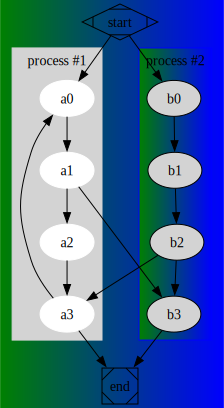

In [12]:
writeFile = False
outfile   = 'Map.dot'

g = Digraph('G', filename='cluster.gv')
g.attr(bgcolor="green:blue")

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey', packmode='graph')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

print(g.source)

if writeFile == True:
    f = open(outfile,"w")
    f.write(h.source)
        
    f.close()

#g.view()

display(g)

// Automaton
digraph {
	0 [shape=circle]
	1 [label=Goal color=green shape=circle style=filled]
	2 [label=Trap color=red shape=circle style=filled]
	3 [shape=plaintext style=invis]
	3 -> 0
	0 -> 0 [label="!Goal & !Trap (0)"]
	0 -> 1 [label="Goal & !Trap (1)" color=green fontcolor=green]
	0 -> 2 [label="Trap (0)" color=red fontcolor=red]
}



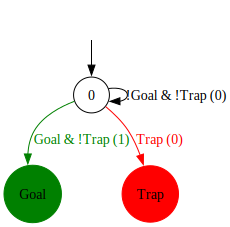

In [13]:
light = True
writeFile = False
outfile   = 'Auto.dot'

if light == True:
    dot = Digraph(comment='Automaton')
else:
    dot = Digraph(comment='Automaton',edge_attr={'color':'gray','fontcolor':'gray'},node_attr={'color':'gray','fontcolor':'black','style':'filled'})
    dot.attr(bgcolor='black', fontcolor='white')

dot.node('0', shape='circle')
dot.node('1', 'Goal',shape='circle',style='filled',color='green')
dot.node('2', 'Trap',shape='circle',style='filled',color='red')
dot.node('3', shape='plaintext',style='invis')

dot.edge('3','0')
dot.edge('0','0','!Goal & !Trap (0)')
dot.edge('0','1','Goal & !Trap (1)',color='green',fontcolor='green')
dot.edge('0','2','Trap (0)',color='red',fontcolor='red')

print(dot.source)

if writeFile == True:
    f = open(outfile,"w")
    f.write(dot.source)
        
    f.close()

#dot.view()   #display externally as a pdf
display(dot) #display in notebook


---

This example shows:
* how to save different file formats. Set ```light``` to ```False``` to enable this feature.
* transparent background



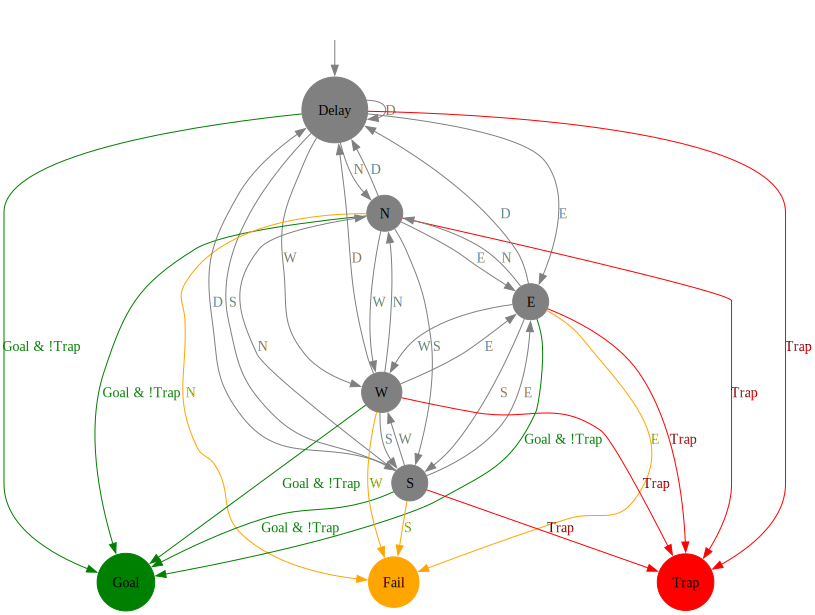

In [14]:
light = False
writeFile = False
outfile   = 'Auto.dot'
outFormat = 'svg' # Options = (png, jpg, pdf, svg, pic)

if light == True:
    dot = Digraph(comment='Automaton')
else:
    dot = Digraph(comment='Automaton',edge_attr={'color':'gray','fontcolor':'gray'},graph_attr={'fixedsize':'false','bgcolor':'transparent'},node_attr={'color':'gray','fontcolor':'black','style':'filled'})
    dot.attr(fontcolor='white')

dot.node('0', 'Delay',shape='circle')
dot.node('1', 'Goal',shape='circle',style='filled',color='green')
dot.node('2', 'Trap',shape='circle',style='filled',color='red')
dot.node('3', 'N',shape='circle')
dot.node('4', 'E',shape='circle')
dot.node('5', 'S',shape='circle')
dot.node('6', 'W',shape='circle')
dot.node('7', 'Fail',shape='circle',style='filled',color='orange')
dot.node('8', shape='plaintext',style='invis')

dot.edge('8','0')
dot.edge('0','0','D')
dot.edge('0','3','N')
dot.edge('0','4','E')
dot.edge('0','5','S')
dot.edge('0','6','W')
dot.edge('0','1','Goal & !Trap',color='green',fontcolor='green')
dot.edge('0','2','Trap',color='red',fontcolor='red')
dot.edge('3','0','D')
dot.edge('3','7','N',color='orange',fontcolor='orange')
dot.edge('3','4','E')
dot.edge('3','5','S')
dot.edge('3','6','W')
dot.edge('3','1','Goal & !Trap',color='green',fontcolor='green')
dot.edge('3','2','Trap',color='red',fontcolor='red')
dot.edge('4','0','D')
dot.edge('4','3','N')
dot.edge('4','7','E',color='orange',fontcolor='orange')
dot.edge('4','5','S')
dot.edge('4','6','W')
dot.edge('4','1','Goal & !Trap',color='green',fontcolor='green')
dot.edge('4','2','Trap',color='red',fontcolor='red')
dot.edge('5','0','D')
dot.edge('5','3','N')
dot.edge('5','4','E')
dot.edge('5','7','S',color='orange',fontcolor='orange')
dot.edge('5','6','W')
dot.edge('5','1','Goal & !Trap',color='green',fontcolor='green')
dot.edge('5','2','Trap',color='red',fontcolor='red')
dot.edge('6','0','D')
dot.edge('6','3','N')
dot.edge('6','4','E')
dot.edge('6','5','S')
dot.edge('6','7','W',color='orange',fontcolor='orange')
dot.edge('6','1','Goal & !Trap',color='green',fontcolor='green')
dot.edge('6','2','Trap',color='red',fontcolor='red')

#print(dot.source)

if writeFile == True:
    dot.render(outfile, format=outFormat)
    
dot.view()   #display externally as a pdf
display(dot) #display in notebook


---

### How to print formatted or unicode characters

The text cannot be formatted as a string (e.g. '...') but must use HTML tags (e.g. '<...>') 

See HTML font tags for more info. Such as here:

https://www.w3docs.com/learn-html/html-font-tag.html

It appears that graphviz does not support the HTML tag 'size' (\<font  size="1">). One needs to use point-size="24.0" instead.


digraph G {
	a [label=<&alpha;>]
}



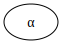

In [32]:
g = Digraph('G')

g.node('a', "<&alpha;>") # can also be g.node('a', "<&945;>")


print(g.source)

display(g)

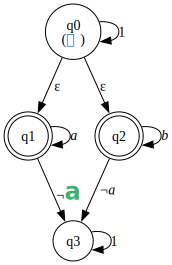

In [55]:
g = Digraph('G')

#g.attr(rotate='90.0')

g.node('1', "q1",shape='doublecircle')
g.node('2', "q2",shape='doublecircle')
g.node('3', "q3",shape='circle')
g.node('0', '<q0<br/>(<font face="Lato" color="#1F78B4">⓿</font>)>',shape='circle')

g.edge('1','1','<<I>a</I>>')
g.edge('1','3','<&not;<font face="Lato" point-size="24.0" color="MediumSeaGreen"><I><B>a</B></I></font>>')
g.edge('0','0','1')
g.edge('0','1','<&epsilon;>')
g.edge('0','2','<&epsilon;>')
g.edge('2','2','<<I>b</I>>')
g.edge('2','3','<&not;<I>a</I>>')
g.edge('3','3','1')

#print(g.source)

display(g)

digraph G {
	node [color=white fontcolor=white]
	edge [color=white fontcolor=white]
	bgcolor=black fontcolor=white
	0 [label=<s0<BR/>{<I>a</I>}>]
	1 [label=<s1<BR/>{<I>b</I>}>]
	a [label=<<I>&alpha;</I>> shape=square]
	b [label=<<I>&beta;</I>> shape=square]
	t [label=<<I>&theta;</I>> shape=square]
	0 -> a
	0 -> b
	a -> 0 [label=0.9]
	a -> 1 [label=0.1]
	b -> 1 [label=1.0]
	1 -> t
	t -> 1 [label=1.0]
}



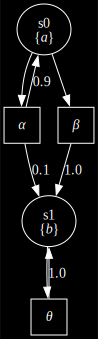

In [17]:
writeFile = False
outfile   = 'Map2.dot'

g = Digraph('G',edge_attr={'color':'white','fontcolor':'white'},node_attr={'color':'white','fontcolor':'white'})

g.attr(bgcolor='black', fontcolor='white')

g.node('0', '<s0<BR/>{<I>a</I>}>')
g.node('1', '<s1<BR/>{<I>b</I>}>')
g.node('a', '<<I>&alpha;</I>>',shape="square")
g.node('b', '<<I>&beta;</I>>',shape="square")
g.node('t', '<<I>&theta;</I>>',shape="square")

g.edge('0','a')
g.edge('0','b')
g.edge('a','0','0.9')
g.edge('a','1','0.1')
g.edge('b','1','1.0')
g.edge('1','t')
g.edge('t','1','1.0')

print(g.source)

if writeFile == True:
    f = open(outfile,"w")
    f.write(g.source)
        
    f.close()

display(g)

---  

This example shows:

* Transparent colors (Nodes and background)
* RGB Colors
* The neato layout engine

Example from graphviz documentation examples:  
https://graphviz.org/Gallery/neato/transparency.html


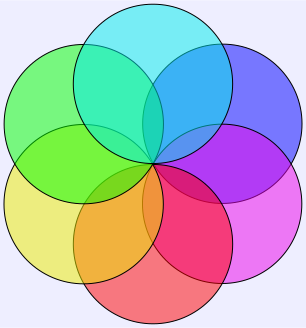

In [18]:
from graphviz import Graph

writeFile = True
outfile   = 'Transparent.dot'

transparent = Graph('Transparent')

transparent.graph_attr = {'layout':'neato','start':'11','bgcolor':"#0000ff11"}
transparent.node_attr={'shape':'circle','width':'2.22','style':'filled'}
transparent.node('5', fillcolor='#0000ff80', label='')
transparent.node('6', fillcolor='#ee00ee80', label='')
transparent.node('1', fillcolor='#ff000080', label='')
transparent.node('2', fillcolor='#eeee0080', label='')
transparent.node('3', fillcolor='#00ff0080', label='')
transparent.node('4', fillcolor='#00eeee80', label='')

transparent.edge('1','2')
transparent.edge('2','3')
transparent.edge('3','4')
transparent.edge('4','5')
transparent.edge('5','6')
transparent.edge('6','1')

#print(transparent.source)

if writeFile == True:
    transparent.render(outfile, format="svg")

transparent.view()   #display externally as a pdf
display(transparent) #display in notebook


Demo for changing label font color and size

digraph H {
	a [label=<<FONT COLOR="RED" POINT-SIZE="24.0" FACE="ambrosia">line4</FONT> and then more stuff>]
	b [label=simple]
	c
	a -> b
	b -> c
}



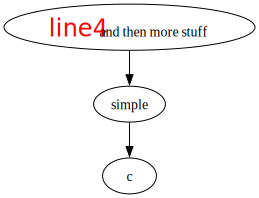

In [19]:
g = Digraph('H')

g.node('a', '<<FONT COLOR="RED" POINT-SIZE="24.0" FACE="ambrosia">line4</FONT> and then more stuff>')
g.node('b', 'simple')
g.node('c')

g.edge('a','b')
g.edge('b','c')

print(g.source)
display(g)

This is a simple dot file reader and printer.

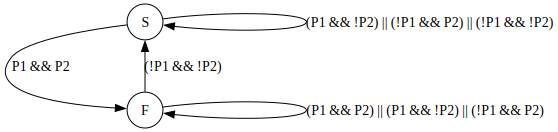

In [20]:
writeFile = True
outFormat = 'pdf'

path = Path(Path.home(),'Programming','Research','DC_Parser')
#path = Path(Path.home(),'Programming','mona-1.4')
dotfile = 'test.dot'
outfile   = 'test.dot'

dot = Source.from_file(path.joinpath(dotfile))

display(dot)

if writeFile == True:
    dot.render(path.joinpath(outfile), format=outFormat)

#for line in dot.__iter__():
#    print(line)
